### Importing Libraries 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score

%matplotlib inline

### Importing our Training and testing data 

In [2]:
pd.set_option('display.max_columns',None)
train = pd.read_csv('./datasets/train.csv') 
train.head(5)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [3]:
test = pd.read_csv('./datasets/test.csv') 
test.head(5) 

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


### Categorical columns in dataframes

In [4]:
columns = [ 'MS Zoning',
       'Street', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd','Mas Vnr Type', 'Exter Qual', 
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2',
       'Heating', 'Heating QC', 'Central Air',
       'Electrical', 'Kitchen Qual', 'Functional', 'Garage Type',
       'Garage Yr Blt', 'Garage Finish',
       'Garage Qual', 'Garage Cond', 'Paved Drive', 'Misc Val','Mo Sold','Sale Type',]


### Data exploration

In [5]:
train.shape

(2051, 81)

In [6]:
test.shape

(878, 80)

##### the train set of data is containes 2051 rows 81 columns  while the test set of data contains 878 rows and 80 columns.

### Data type check 

In [7]:
train.dtypes

Id                int64
PID               int64
MS SubClass       int64
MS Zoning        object
Lot Frontage    float64
                 ...   
Misc Val          int64
Mo Sold           int64
Yr Sold           int64
Sale Type        object
SalePrice         int64
Length: 81, dtype: object

### counting missing values in train and test dataset 

In [8]:
train.isnull().mean()

Id              0.000000
PID             0.000000
MS SubClass     0.000000
MS Zoning       0.000000
Lot Frontage    0.160897
                  ...   
Misc Val        0.000000
Mo Sold         0.000000
Yr Sold         0.000000
Sale Type       0.000000
SalePrice       0.000000
Length: 81, dtype: float64

In [9]:
test.isnull().mean()

Id              0.000000
PID             0.000000
MS SubClass     0.000000
MS Zoning       0.000000
Lot Frontage    0.182232
                  ...   
Misc Feature    0.953303
Misc Val        0.000000
Mo Sold         0.000000
Yr Sold         0.000000
Sale Type       0.000000
Length: 80, dtype: float64

### ploting missing value for each data frame 

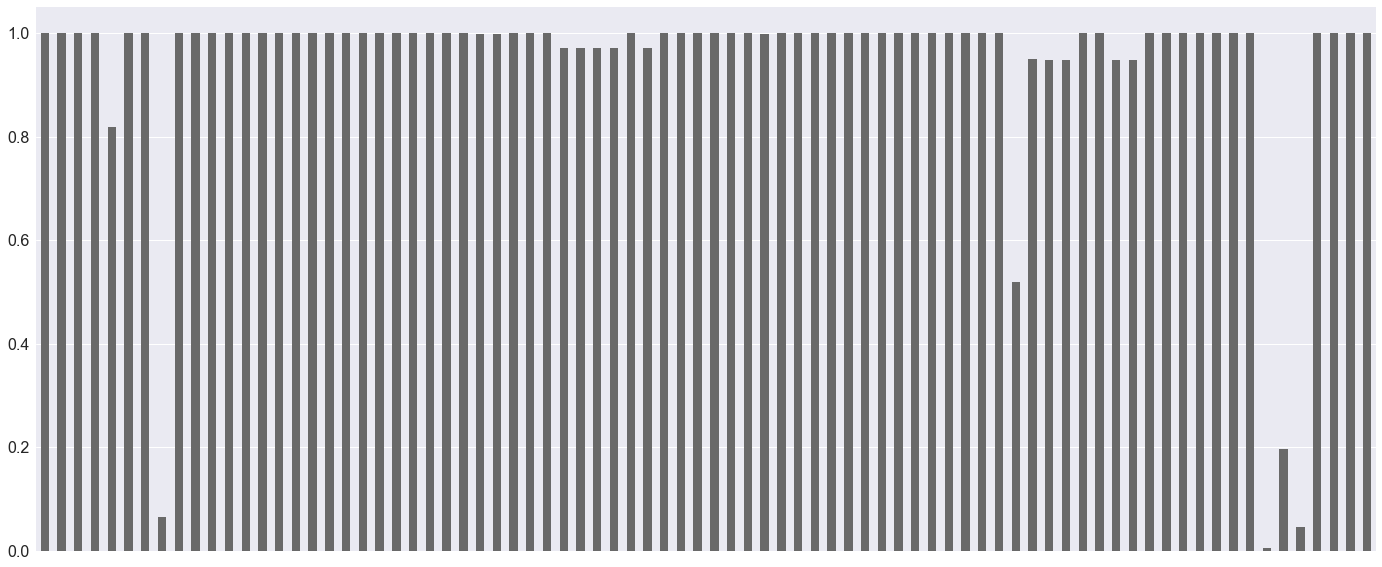

In [282]:
msno.bar(test)

#### deleting columns with large proportion of missing value ratio

In [283]:
drops=['Pool QC','Fence','Misc Feature','Fireplace Qu','Alley']
train.drop(drops,axis=1,inplace=True)
train.head(3)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,0,1,2010,WD,109000


In [284]:
drops=['Pool QC','Fence','Misc Feature','Fireplace Qu','Alley']
test.drop(drops,axis=1,inplace=True)
test.head(3)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,0,9,2006,New


### Deleting all rows containing missing value using function Dropna

In [285]:
train.dropna(axis=0,inplace = True)
train.shape 

(1556, 76)

In [286]:
test.dropna(axis=0,inplace = True)
test.shape

(661, 75)

#### approximatly 25% of data were lost due to missing values 

### Descriptive statistical analysis of data 

#### Defining correlation between the target value and features to be chosen 

In [287]:
variable=['1st Flr SF','Total Bsmt SF','Garage Area','Gr Liv Area','Overall Qual','SalePrice']
feat=train[variable]

<Figure size 720x360 with 0 Axes>

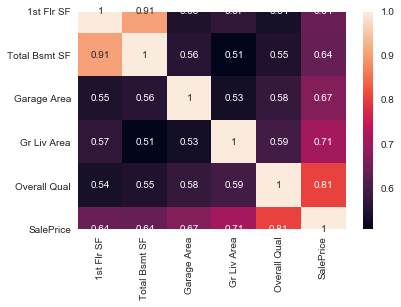

<Figure size 720x360 with 0 Axes>

In [288]:
sns.heatmap(feat.corr(),annot=True)
plt.figure(figsize=(10,5))

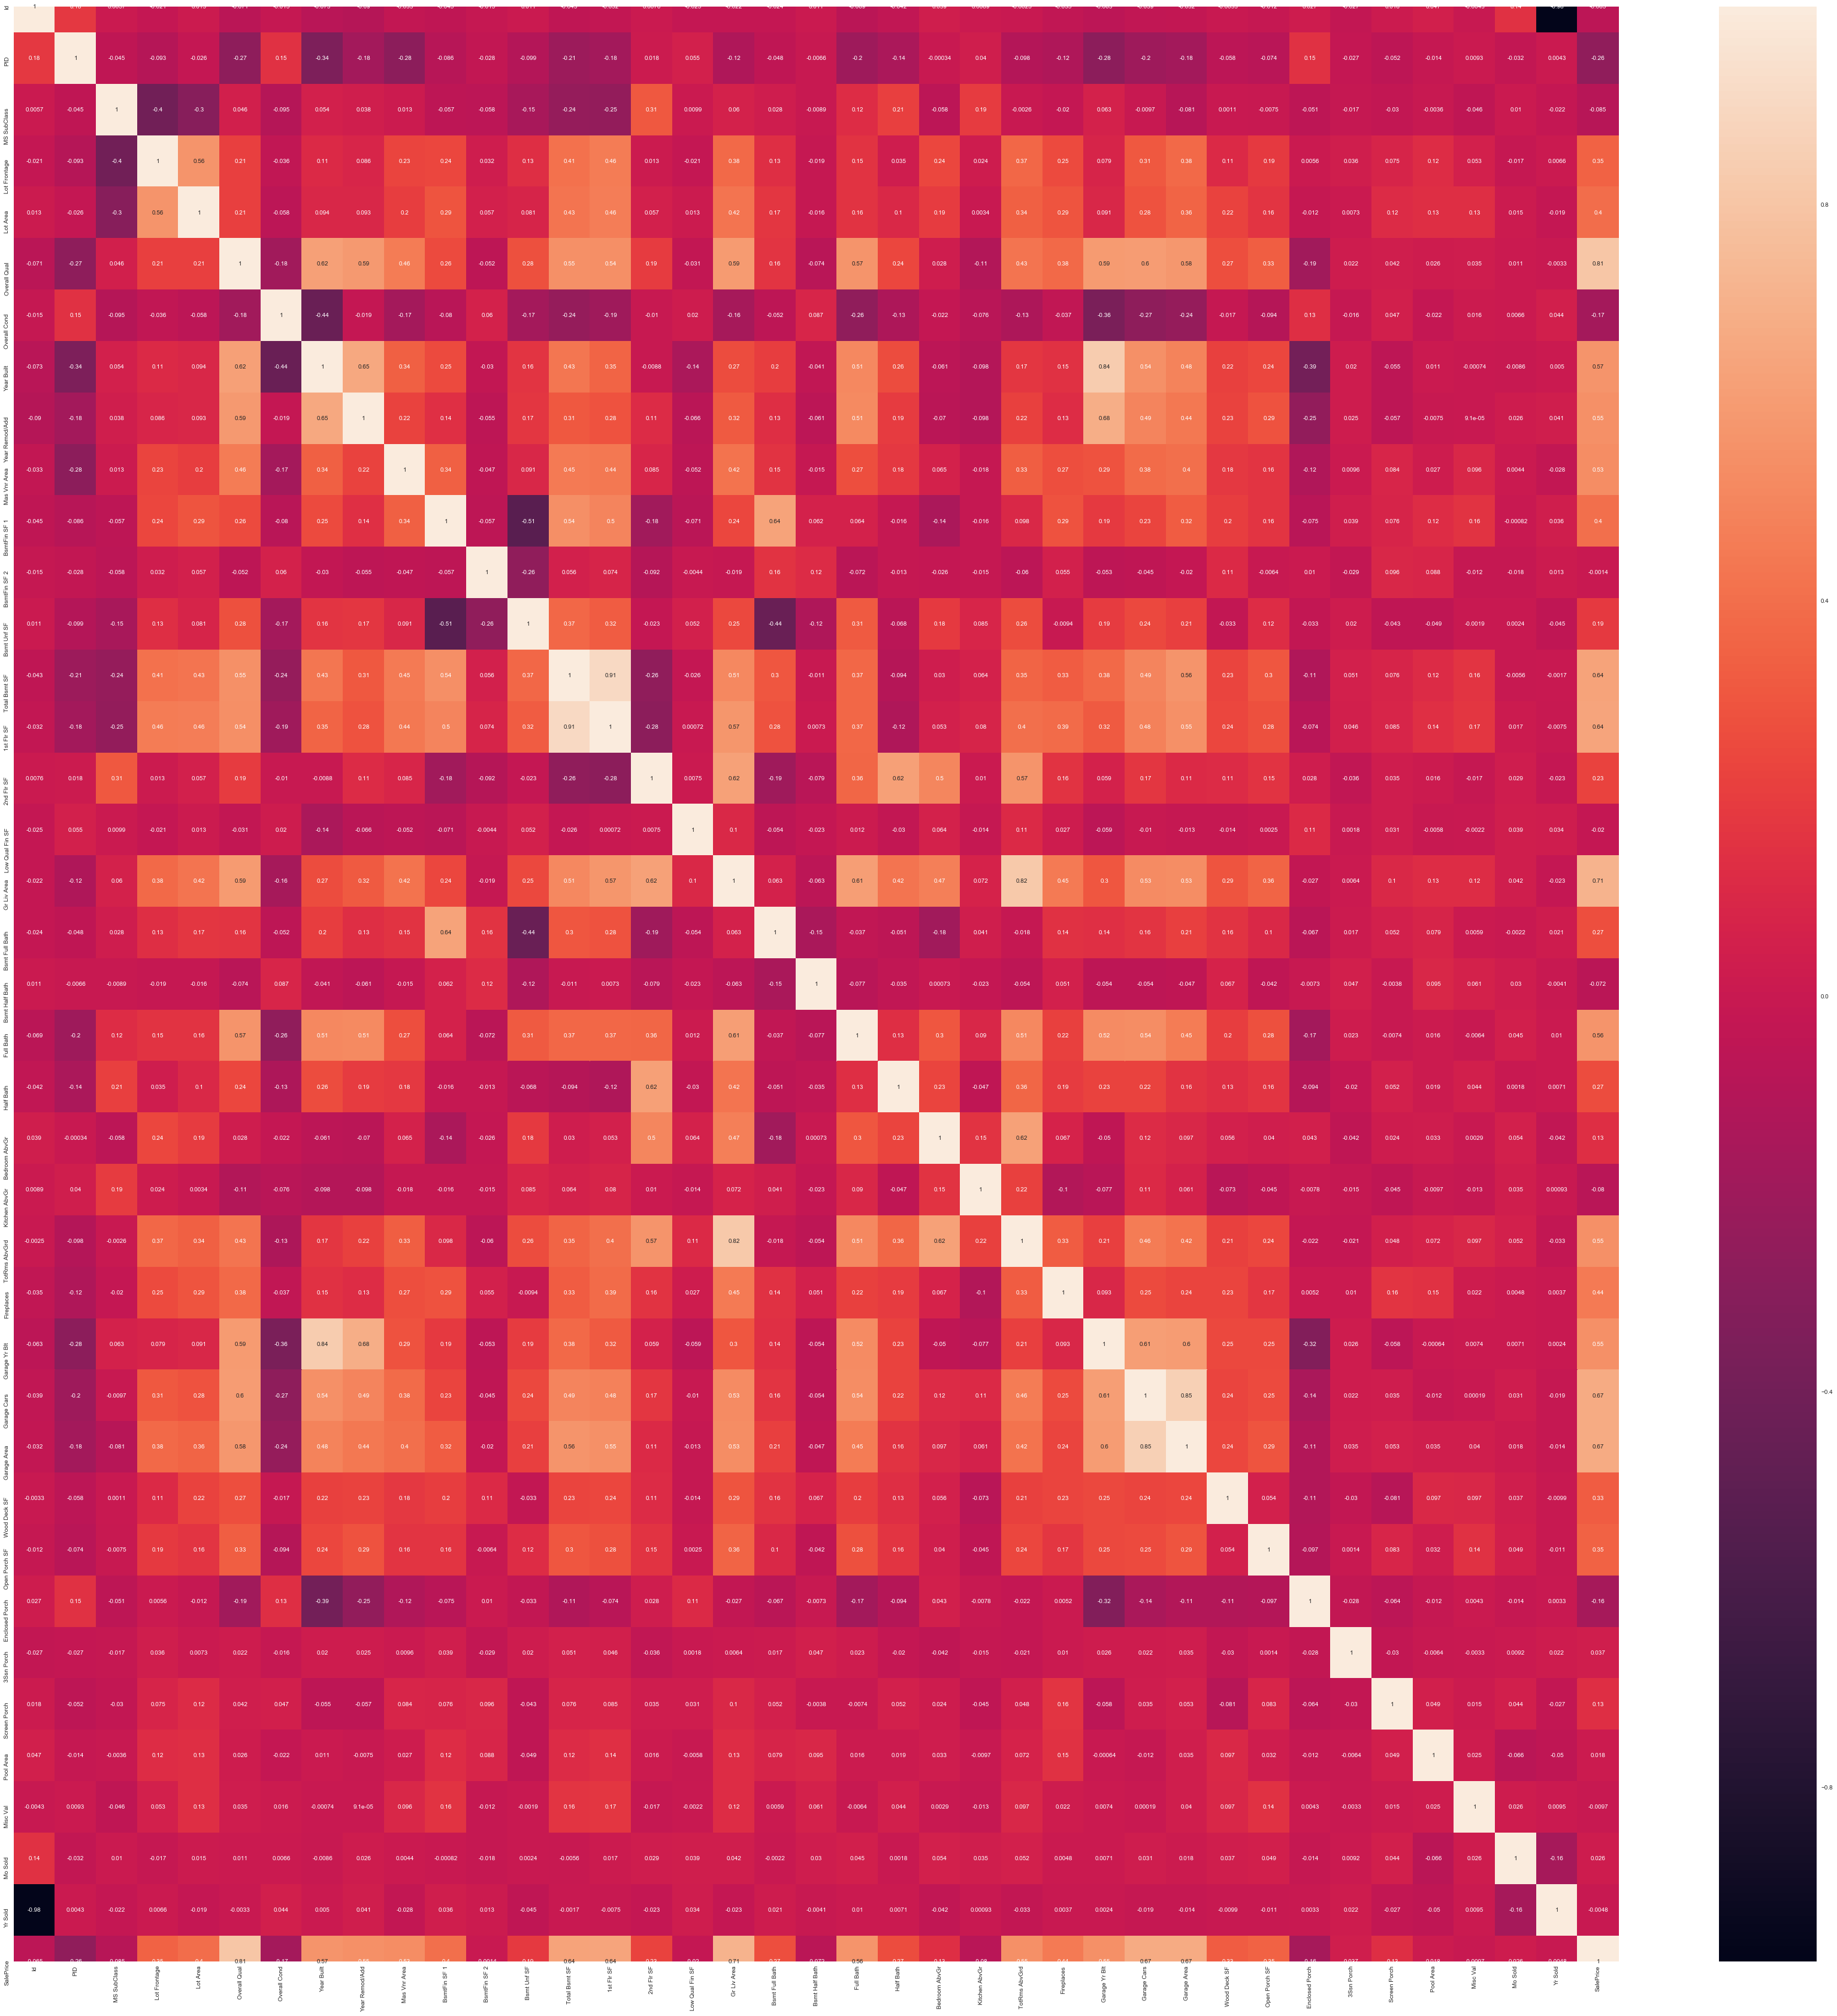

In [289]:
plt.figure(figsize=(60,60))
sns.heatmap(train.corr(), annot=True)

#### As shown on heatmap above, the sale price tend to be more correlated with with the overall quality of the hourse and the grand living area

In [290]:
train.corr()['SalePrice'].sort_values() 

PID               -0.258407
Overall Cond      -0.169800
Enclosed Porch    -0.159134
MS SubClass       -0.085244
Kitchen AbvGr     -0.080107
Bsmt Half Bath    -0.071948
Id                -0.064578
Low Qual Fin SF   -0.020373
Misc Val          -0.009741
Yr Sold           -0.004824
BsmtFin SF 2      -0.001433
Pool Area          0.018137
Mo Sold            0.026425
3Ssn Porch         0.036788
Bedroom AbvGr      0.128563
Screen Porch       0.133237
Bsmt Unf SF        0.187043
2nd Flr SF         0.225768
Half Bath          0.265558
Bsmt Full Bath     0.268709
Wood Deck SF       0.328390
Open Porch SF      0.345591
Lot Frontage       0.350159
Lot Area           0.395080
BsmtFin SF 1       0.404562
Fireplaces         0.444672
Mas Vnr Area       0.533399
Year Remod/Add     0.547044
TotRms AbvGrd      0.547071
Garage Yr Blt      0.550117
Full Bath          0.560577
Year Built         0.567054
Total Bsmt SF      0.636414
1st Flr SF         0.641073
Garage Area        0.672298
Garage Cars        0

#### Feature selections and visualisation 


#### target feature or dependent feature: Y= Sale price 
#### Explanatory feature X = Over quality of the house , 1 st flor sq, total basement sq, grand living Area

In [291]:
train['interaction'] =train['1st Flr SF']*train['2nd Flr SF']**2
train['interaction'] 

1       1334514753
2                0
3        364560000
4        313283676
5                0
           ...    
2045             0
2046             0
2048     643522932
2049             0
2050     619036928
Name: interaction, Length: 1556, dtype: int64

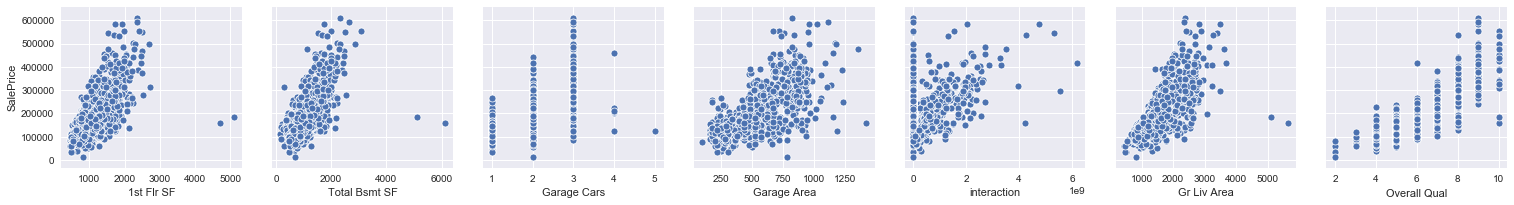

In [292]:

plt.style.use('seaborn')
sns.pairplot(train ,y_vars=['SalePrice'], x_vars=['1st Flr SF','Total Bsmt SF','Garage Cars','Garage Area','interaction','Gr Liv Area','Overall Qual'],height=3)
plt.savefig('correlation.svg')

#### as we can see above , the sale price of a house is significant affeted by several factors 

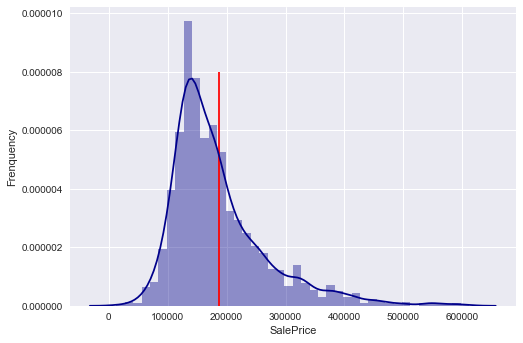

In [293]:
sns.distplot(train['SalePrice'], color='darkblue')
#plt.plot(train['SalePrice'].mean())
plt.style.use('seaborn')
plt.yticks()
plt.ylabel('Frenquency')
plt.vlines(x=train['SalePrice'].mean(), ymin=0, ymax=0.000002*4, color='r')
plt.savefig('dist.svg')

In [294]:
train['SalePrice'].describe()

count      1556.000000
mean     186225.881105
std       82116.659278
min       12789.000000
25%      132000.000000
50%      165000.000000
75%      215000.000000
max      611657.000000
Name: SalePrice, dtype: float64

In [295]:
train['SalePrice'].mean()

186225.88110539847

In [296]:
train['SalePrice'].std()

82116.65927787634

#### let have a look a the distribution of the the sale price, it might be noticed that the sale price is skewed around the mean sale price of 186226 with a standard deviation of 82116

#### feature selection are based on the condition of linearity to the target feature. 

#### Overview on how selected features are distributed 

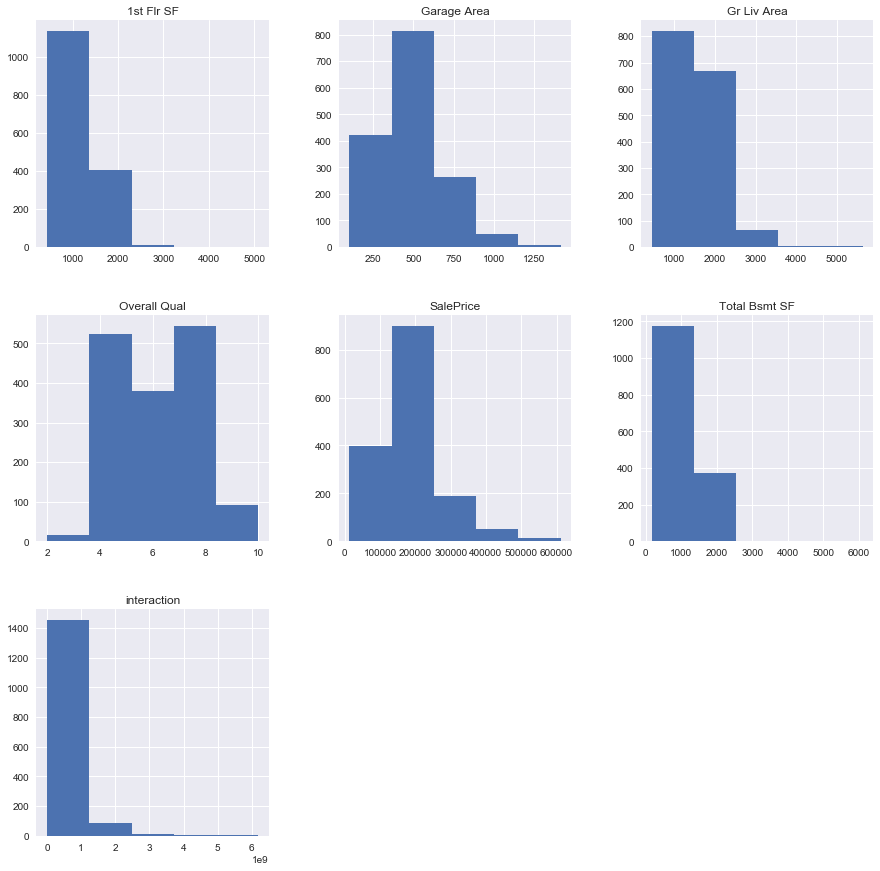

In [297]:
variable=['1st Flr SF','Total Bsmt SF','Garage Area','interaction','Gr Liv Area','Overall Qual','SalePrice']
train[variable].hist(bins=5 ,figsize=(15,15));

#### As shown on charts , some of the features are strongly positive skewed  distributed which can lead to our model to poorly  perform on the general deta configuration 

### Total basement distribution 

AxesSubplot(0.125,0.125;0.775x0.755)


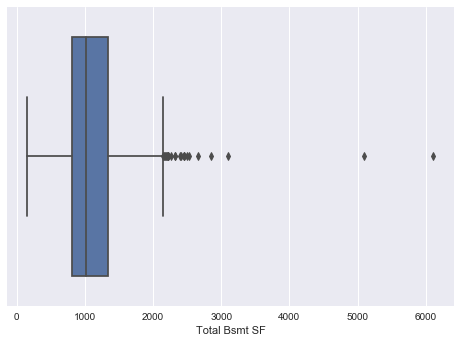

In [298]:
print(sns.boxplot(train['Total Bsmt SF']))
plt.style.use('seaborn')


###  lot area distribution 

AxesSubplot(0.125,0.125;0.775x0.755)


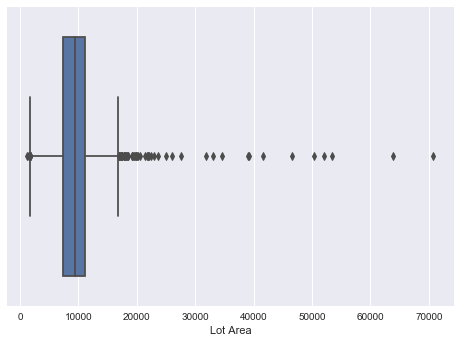

In [299]:
print(sns.boxplot(train['Lot Area']))

### Overall quality distribution

AxesSubplot(0.125,0.125;0.775x0.755)


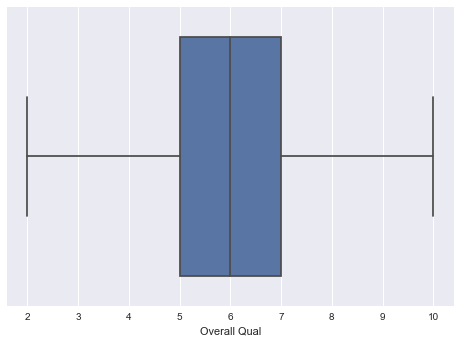

In [300]:
print(sns.boxplot(train['Overall Qual']))

In [301]:
       columns = [ 'MS Zoning',
       'Street', 'Lot Shape' 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd','Mas Vnr Type', 'Exter Qual', 
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2',
       'Heating', 'Heating QC', 'Central Air',
       'Electrical', 'Kitchen Qual', 'Functional', 'Garage Type',
       'Garage Yr Blt', 'Garage Finish',
       'Garage Qual', 'Garage Cond', 'Paved Drive', 'Misc Val','Mo Sold','Sale Type',]


In [302]:
train.columns 

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Garage Type',
       'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'G

#### merging the train dataset and the test dataset 

In [303]:
df=pd.concat([train,test],axis=0,sort=False)
transf=df.copy()

In [304]:
transf.shape

(2217, 77)

In [305]:
transf.shape

(2217, 77)

In [306]:
transf.isnull().sum()

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage      0
               ... 
Mo Sold           0
Yr Sold           0
Sale Type         0
SalePrice       661
interaction     661
Length: 77, dtype: int64

In [307]:
transf.tail()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,interaction
873,1662,527377110,60,RL,80.0,8000,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,PosN,Norm,1Fam,2Story,6,6,1974,1974,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,931.0,LwQ,153.0,0.0,1084.0,GasA,TA,Y,SBrkr,1084,793,0,1877,1.0,0.0,2,1,4,1,TA,8,Typ,1,Attchd,1974.0,Unf,2.0,488.0,TA,TA,Y,0,96,0,0,0,0,0,11,2007,WD,NaN,NaN
874,1234,535126140,60,RL,90.0,14670,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,2Story,6,7,1966,1999,Gable,CompShg,VinylSd,VinylSd,BrkFace,410.0,Gd,Gd,CBlock,TA,TA,No,BLQ,575.0,Unf,0.0,529.0,1104.0,GasA,Ex,Y,SBrkr,1104,884,0,1988,0.0,0.0,2,1,4,1,Gd,9,Typ,1,Attchd,1966.0,RFn,2.0,480.0,TA,TA,Y,0,230,0,0,0,0,0,8,2008,WD,NaN,NaN
875,1373,904100040,20,RL,55.0,8250,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,Norm,1Fam,1Story,5,5,1968,1968,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,250.0,LwQ,492.0,210.0,952.0,GasA,Ex,Y,SBrkr,1211,0,0,1211,0.0,0.0,1,0,3,1,TA,5,Typ,1,Attchd,1968.0,Unf,1.0,322.0,TA,TA,Y,0,63,0,0,0,0,0,8,2008,WD,NaN,NaN
876,1672,527425140,20,RL,60.0,9000,Pave,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,6,1971,1971,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,TA,TA,No,ALQ,616.0,Unf,0.0,248.0,864.0,GasA,TA,Y,SBrkr,864,0,0,864,0.0,0.0,1,0,3,1,TA,5,Typ,0,Detchd,1974.0,Unf,2.0,528.0,TA,TA,Y,0,0,0,0,0,0,0,5,2007,WD,NaN,NaN
877,1939,535327160,20,RL,70.0,8400,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1955,1955,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,CBlock,TA,TA,No,BLQ,793.0,Unf,0.0,130.0,923.0,GasA,TA,Y,SBrkr,925,0,0,925,1.0,0.0,1,0,3,1,TA,5,Typ,2,Attchd,1955.0,Unf,1.0,390.0,TA,TA,Y,81,0,0,0,0,0,0,3,2007,WD,NaN,NaN


In [308]:
transf.shape

(2217, 77)

In [310]:
columns =['MS Zoning','Street','Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2','Bldg Type',
       'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd','Mas Vnr Type', 'Exter Qual', 
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1','BsmtFin Type 2',
       'Heating', 'Heating QC', 'Central Air',
       'Electrical', 'Kitchen Qual', 'Functional', 'Garage Type',
       'Garage Finish',
       'Garage Qual', 'Garage Cond', 'Paved Drive', 'Misc Val','Mo Sold','Sale Type']

transf

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,interaction
1,544,531379050,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,0,4,2009,WD,220000.0,1.334515e+09
2,153,535304180,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,0,1,2010,WD,109000.0,0.000000e+00
3,318,916386060,60,RL,73.0,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,0,4,2010,WD,174000.0,3.645600e+08
4,255,906425045,50,RL,82.0,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,0,3,2010,WD,138500.0,3.132837e+08
5,138,535126040,20,RL,137.0,16492,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,PosA,Norm,1Fam,1Story,6,6,1966,2002,Gable,CompShg,BrkFace,Plywood,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,247.0,Rec,713.0,557.0,1517.0,GasA,Ex,Y,SBrkr,1888,0,0,1888,0.0,0.0,2,1,2,1,Gd,6,Mod,1,Attchd,1966.0,Fin,2.0,578.0,TA,TA,Y,0,0,0,0,0,0,0,6,2010,WD,190000.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,1662,527377110,60,RL,80.0,8000,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,PosN,Norm,1Fam,2Story,6,6,1974,1974,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,931.0,LwQ,153.0,0.0,1084.0,GasA,TA,Y,SBrkr,1084,793,0,1877,1.0,0.0,2,1,4,1,TA,8,Typ,1,Attchd,1974.0,Unf,2.0,488.0,TA,TA,Y,0,96,0,0,0,0,0,11,2007,WD,NaN,NaN
874,1234,535126140,60,RL,90.0,14670,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,2Story,6,7,1966,1999,Gable,CompShg,VinylSd,VinylSd,BrkFace,410.0,Gd,Gd,CBlock,TA,TA,No,BLQ,575.0,Unf,0.0,529.0,1104.0,GasA,Ex,Y,SBrkr,1104,884,0,1988,0.0,0.0,2,1,4,1,Gd,9,Typ,1,Attchd,1966.0,RFn,2.0,480.0,TA,TA,Y,0,230,0,0,0,0,0,8,2008,WD,NaN,NaN
875,1373,904100040,20,RL,55.0,8250,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,Norm,1Fam,1Story,5,5,1968,1968,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,250.0,LwQ,492.0,210.0,952.0,GasA,Ex,Y,SBrkr,1211,0,0,1211,0.0,0.0,1,0,3,1,TA,5,Typ,1,Attchd,1968.0,Unf,1.0,322.0,TA,TA,Y,0,63,0,0,0,0,0,8,2008,WD,NaN,NaN
876,1672,527425140,20,RL,60.0,9000,Pave,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,6,1971,

### creating a transformed dataframe

#### converting categorical data into bineary

In [311]:
  columns = ['MS Zoning','Street', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
         'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
         'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st',
         'Exterior 2nd','Mas Vnr Type', 'Exter Qual', 
         'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
         'BsmtFin Type 1', 'BsmtFin Type 2',
         'Heating', 'Heating QC', 'Central Air',
         'Electrical', 'Kitchen Qual', 'Functional', 'Garage Type',
         'Garage Finish',
         'Garage Qual', 'Garage Cond', 'Paved Drive', 'Misc Val','Mo Sold','Sale Type']
#def categorical_(column):
  #  final=df
 #   i=0 
  #  for item liste :
dummis = pd.get_dummies(transf[columns],drop_first=True)
dummis

,Misc Val,Mo Sold,MS Zoning_FV,MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Mod,Land Slope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRNn,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Roll,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Other,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkFace,Mas Vnr Type_CBlock,Mas Vnr Type_None,Mas Vnr Type_Stone,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Exter Cond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,Bsmt Qual_Fa,Bsmt Qual_Gd,Bsmt Qual_Po,Bsmt Qual_TA,Bsmt Cond_Fa,Bsmt Cond_Gd,Bsmt Cond_Po,Bsmt Cond_TA,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Bsmt Exposure_No,BsmtFin Type 1_BLQ,BsmtFin Type 1_GLQ,BsmtFin Type 1_LwQ,BsmtFin Type 1_Rec,BsmtFin Type 1_Unf,BsmtFin Type 2_BLQ,BsmtFin Type 2_GLQ,BsmtFin Type 2_LwQ,BsmtFin Type 2_Rec,BsmtFin Type 2_Unf,Heating_GasW,Heating_Grav,Heating_OthW,Heating QC_Fa,Heating QC_Gd,Heating QC_Po,Heating QC_TA,Central Air_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_Po,Kitchen Qual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Typ,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Finish_RFn,Garage Finish_Unf,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_Po,Garage Qual_TA,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_Po,Garage Cond_TA,Paved Drive_P,Paved Drive_Y,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD
1,0,4,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
2,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0

In [312]:
dummis.shape

(2217, 191)

In [313]:
dummis.columns 

Index(['Misc Val', 'Mo Sold', 'MS Zoning_FV', 'MS Zoning_RH', 'MS Zoning_RL',
       'MS Zoning_RM', 'Street_Pave', 'Lot Shape_IR2', 'Lot Shape_IR3',
       'Lot Shape_Reg',
       ...
       'Paved Drive_Y', 'Sale Type_CWD', 'Sale Type_Con', 'Sale Type_ConLD',
       'Sale Type_ConLI', 'Sale Type_ConLw', 'Sale Type_New', 'Sale Type_Oth',
       'Sale Type_VWD', 'Sale Type_WD '],
      dtype='object', length=191)

In [314]:
  columns = ['MS Zoning','Street', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
         'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
         'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st',
         'Exterior 2nd','Mas Vnr Type', 'Exter Qual', 
         'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
         'BsmtFin Type 1', 'BsmtFin Type 2',
         'Heating', 'Heating QC', 'Central Air',
         'Electrical', 'Kitchen Qual', 'Functional', 'Garage Type',
         'Garage Finish',
         'Garage Qual', 'Garage Cond', 'Paved Drive', 'Misc Val','Mo Sold','Sale Type']
transf.drop(columns,axis=1,inplace=True)  
transf

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Yr Sold,SalePrice,interaction
1,544,531379050,60,43.0,11492,7,5,1996,1997,132.0,637.0,0.0,276.0,913.0,913,1209,0,2122,1.0,0.0,2,1,4,1,8,1,1997.0,2.0,559.0,0,74,0,0,0,0,2009,220000.0,1.334515e+09
2,153,535304180,20,68.0,7922,5,7,1953,2007,0.0,731.0,0.0,326.0,1057.0,1057,0,0,1057,1.0,0.0,1,0,3,1,5,0,1953.0,1.0,246.0,0,52,0,0,0,0,2010,109000.0,0.000000e+00
3,318,916386060,60,73.0,9802,5,5,2006,2007,0.0,0.0,0.0,384.0,384.0,744,700,0,1444,0.0,0.0,2,1,3,1,7,0,2007.0,2.0,400.0,100,0,0,0,0,0,2010,174000.0,3.645600e+08
4,255,906425045,50,82.0,14235,6,8,1900,1993,0.0,0.0,0.0,676.0,676.0,831,614,0,1445,0.0,0.0,2,0,3,1,6,0,1957.0,2.0,484.0,0,59,0,0,0,0,2010,138500.0,3.132837e+08
5,138,535126040,20,137.0,16492,6,6,1966,2002,0.0,247.0,713.0,557.0,1517.0,1888,0,0,1888,0.0,0.0,2,1,2,1,6,1,1966.0,2.0,578.0,0,0,0,0,0,0,2010,190000.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,1662,527377110,60,80.0,8000,6,6,1974,1974,0.0,931.0,153.0,0.0,1084.0,1084,793,0,1877,1.0,0.0,2,1,4,1,8,1,1974.0,2.0,488.0,0,96,0,0,0,0,2007,NaN,NaN
874,1234,535126140,60,90.0,14670,6,7,1966,1999,410.0,575.0,0.0,529.0,1104.0,1104,884,0,1988,0.0,0.0,2,1,4,1,9,1,1966.0,2.0,480.0,0,230,0,0,0,0,2008,NaN,NaN
875,1373,904100040,20,55.0,8250,5,5,1968,1968,0.0,250.0,492.0,210.0,952.0,1211,0,0,1211,0.0,0.0,1,0,3,1,5,1,1968.0,1.0,322.0,0,63,0,0,0,0,2008,NaN,NaN
876,1672,527425140,20,60.0,9000,4,6,1971,1971,0.0,616.0,0.0,248.0,864.0,864,0,0,864,0.0,0.0,1,0,3,1,5,0,1974.0,2.0,528.0,0,0,0,0,0,0,2007,NaN,NaN


In [315]:
final_df=pd.concat([transf,dummis],axis=1)
final_df

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Yr Sold,SalePrice,interaction,Misc Val,Mo Sold,MS Zoning_FV,MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Mod,Land Slope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRNn,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Roll,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Other,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkFace,Mas Vnr Type_CBlock,Mas Vnr Type_None,Mas Vnr Type_Stone,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Exter Cond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,Bsmt Qual_Fa,Bsmt Qual_Gd,Bsmt Qual_Po,Bsmt Qual_TA,Bsmt Cond_Fa,Bsmt Cond_Gd,Bsmt Cond_Po,Bsmt Cond_TA,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Bsmt Exposure_No,BsmtFin Type 1_BLQ,BsmtFin Type 1_GLQ,BsmtFin Type 1_LwQ,BsmtFin Type 1_Rec,BsmtFin Type 1_Unf,BsmtFin Type 2_BLQ,BsmtFin Type 2_GLQ,BsmtFin Type 2_LwQ,BsmtFin Type 2_Rec,BsmtFin Type 2_Unf,Heating_GasW,Heating_Grav,Heating_OthW,Heating QC_Fa,Heating QC_Gd,Heating QC_Po,Heating QC_TA,Central Air_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_Po,Kitchen Qual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Typ,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Finish_RFn,Garage Finish_Unf,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_Po,Garage Qual_TA,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_Po,Garage Cond_TA,Paved Drive_P,Paved Drive_Y,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD
1,544,531379050,60,43.0,11492,7,5,1996,1997,132.0,637.0,0.0,276.0,913.0,913,1209,0,2122,1.0,0.0,2,1,4,1,8,1,1997.0,2.0,559.0,0,74,0,0,0,0,2009,220000.0,1.334515e+09,0,4,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [316]:
final_df['SalePrice'].isnull().sum()

661

In [317]:
final_df.columns 

Index(['Id', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       ...
       'Paved Drive_Y', 'Sale Type_CWD', 'Sale Type_Con', 'Sale Type_ConLD',
       'Sale Type_ConLI', 'Sale Type_ConLw', 'Sale Type_New', 'Sale Type_Oth',
       'Sale Type_VWD', 'Sale Type_WD '],
      dtype='object', length=229)

In [318]:
m=['SalePrice']
final_df.drop(columns=m, inplace=True) # dropping numerical columns 

### Feature selection 

In [319]:
np.random.seed(42)
features=['1st Flr SF','Total Bsmt SF','Garage Area','interaction','Gr Liv Area','Overall Qual','Lot Area']
X=train[features]
y=train['SalePrice']

### split and strain data for modeling 

In [320]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [321]:
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

### instantiate model 

In [322]:
lr = LinearRegression() 

In [323]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [324]:
lr.coef_# coefficient of regression

array([13485.81089583,  5293.03331137, 13347.80623327, 16517.35623056,
         426.81795907, 41641.96583928,  5226.53717499])

In [325]:
lr.intercept_  # intercept 

186944.0353697749

### model evaluation 

In [326]:
cross_val_score(lr,X_train,y_train, cv=5).mean() # 5 fold cross validation 

0.7525338647947721

In [327]:
lr.score(X_train, y_train) # r2 on train data 

0.7805084174698816

In [328]:
lr.score(X_test, y_test) # r2 on test data 

0.8108873800102849

In [329]:
#r2_score(y_train,pred) #r2 

In [330]:
lr.score(X_train,y_train)

0.7805084174698816

In [331]:
lr.score(X_test, y_test)

0.8108873800102849

#### 78% variation of sale price  is explained by X with low baies 

In [333]:
pred = lr.predict(X_train)
pred.mean()

186944.0353697749

In [334]:
residual=y_train-pred
residual 

1041   -29473.911000
1643    33993.575598
1029   -10336.751368
1723   -27826.263353
509     77317.049093
            ...     
1494   -43342.981121
1716   -35466.559176
1140    -6455.096590
1922     5372.757738
1488   -37971.391694
Name: SalePrice, Length: 1244, dtype: float64

In [335]:
pred=lr.predict(X_train)
pred

array([185473.91100001,  27506.42440226, 170336.75136774, ...,
       318955.09659031, 128627.24226187, 116971.39169421])

In [336]:
y_test.mean()

183362.47115384616

In [337]:
residual

1041   -29473.911000
1643    33993.575598
1029   -10336.751368
1723   -27826.263353
509     77317.049093
            ...     
1494   -43342.981121
1716   -35466.559176
1140    -6455.096590
1922     5372.757738
1488   -37971.391694
Name: SalePrice, Length: 1244, dtype: float64

In [338]:
residual.std() # residual standard deviation 

38205.645885982245

In [339]:
np.abs(residual).mean()

24437.456095889942

In [340]:
r2_score(y_train, pred)

0.7805084174698816

#### Distribution of residuals

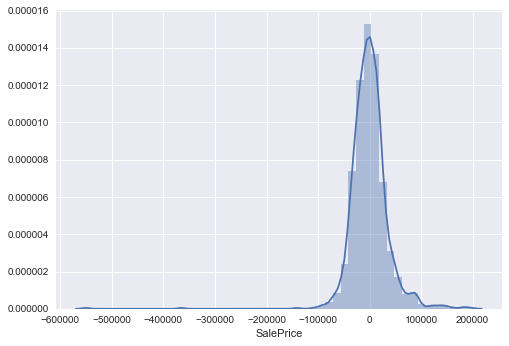

In [341]:
sns.distplot(residual, norm_hist=True,) # plotting the residual distribution

#### How residual indenpendly seem to approximate a normal distribution centered  around zero.

### Model evaluation 

In [342]:
import statsmodels.api as sm

In [343]:
X =train[['1st Flr SF','Total Bsmt SF','Garage Cars','Garage Area','Gr Liv Area','Overall Qual','Lot Area']]
X = sm.add_constant(X)
y = train['SalePrice']

C:\Users\kajib\Anaconda3\patkajos812\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [344]:
 lr = sm.OLS(y, X).fit()

In [345]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     806.7
Date:                Fri, 10 Apr 2020   Prob (F-statistic):               0.00
Time:                        13:22:46   Log-Likelihood:                -18620.
No. Observations:                1556   AIC:                         3.726e+04
Df Residuals:                    1548   BIC:                         3.730e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.274e+05   4646.282    -27.416      0.000   -1.36e+05   -1.18e+05
1st Flr SF        8.4869      6.057      1.401      0.161      -3.394      20.368
Total Bsmt SF    17.4261      5.491      3.174      0.002       6.656      28.196
Garage Cars    1.369e+04   2913.255      4.700      0.000    7976.890    1.94e+04
Garage Area      36.6738     10.239      3.582      0.000      16.590      56.757
Gr Liv Area      36.3647      2.794     13.014      0.000      30.884      41.846
Overall Qual   2.766e+04   1006.044     27.498      0.000    2.57e+04    2.96e+04
Lot Area          1.4036      0.233      6.025      0.000       0.947       1.861
==============================================================================
Omnibus:                      794.484   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            71885.903
Skew:                          -1.462   Prob(JB):                         0.00
Kurtosis:                      36.170   Cond. No.                     5.37e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Based on our data  , 78% variation of  the house sale price at a given time is influenced by a combination of physical factors which are: the overall quality of the house ,the 1fst and 2nd  floor area, total basement sq, grand living, garage area , the lot area and the second second floor area.

#### let consider some interaction and do some transformation to our data to improve the perfomance of our model 

###  How likely a house is to be purchased given its sale price in a given month?

In [346]:
month = {1:'january', 2:'febrary' , 3:'march', 4:'april', 5:'may', 6:'jun' , 7:'july' , 8: 'august', 9:'september',10:'october',11:'november', 12:'december'}
months=train['Mo Sold'].map(month) # mapping the dictionnary 

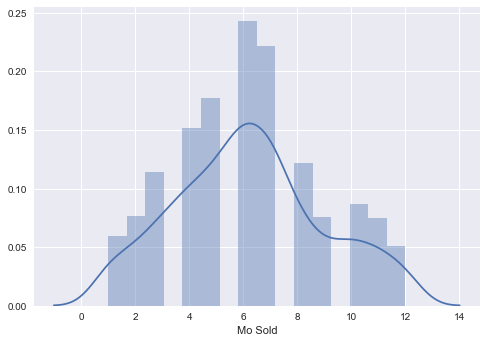

In [347]:
sns.distplot(train['Mo Sold'])

#### since a high volume of sale occurs in jun , let 

#### the number house sold in a given month

In [348]:
train.groupby('Mo Sold')['SalePrice'].mean() #  group the average price of home per month.

Mo Sold
1     202005.125000
2     178988.512195
3     181995.942623
4     171263.975309
5     183199.521053
6     188445.253846
7     191225.822785
8     191849.992308
9     192982.123457
10    184165.064516
11    186789.775000
12    189946.127273
Name: SalePrice, dtype: float64

In [349]:
#sold = {1:'january', 2:'febrary' , 3:'march', 4:'april', 5:'may', 6:'jun' , 7:'july' , 8: 'august', 9:'september',10:'october',11:'november', 12:'december'}
month=pd.get_dummies(months)
month.head(2)

,april,august,december,febrary,january,july,jun,march,may,november,october,september
1,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0


In [350]:
month.shape

(1556, 12)

#### data frame combining months and sale price 

In [351]:
df_2=pd.concat([month,train['SalePrice']],axis=1, sort=False)
df_2.head()

,april,august,december,febrary,january,july,jun,march,may,november,october,september,SalePrice
1,1,0,0,0,0,0,0,0,0,0,0,0,220000
2,0,0,0,0,1,0,0,0,0,0,0,0,109000
3,1,0,0,0,0,0,0,0,0,0,0,0,174000
4,0,0,0,0,0,0,0,1,0,0,0,0,138500
5,0,0,0,0,0,0,1,0,0,0,0,0,190000


In [352]:
df_2[['jun','SalePrice']].head()

,jun,SalePrice
1,0,220000
2,0,109000
3,0,174000
4,0,138500
5,1,190000


In [353]:
df_2['SalePrice'].min()

12789

In [354]:
df_2['SalePrice'].max()

611657

### In our case we have two classes: 1= house sold  and 0= house not sold 

### Landing into Logistic model 

In [356]:
y = df_2['jun']
X = df_2[['SalePrice']]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)
from sklearn.linear_model import LogisticRegression

In [357]:
lg = LogisticRegression() # instantiate logistic model 

In [358]:
lg.fit(X_train, y_train) # fitting our model 

C:\Users\kajib\Anaconda3\patkajos812\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [359]:
intercept = lg.intercept_
intercept

array([-1.61484523])

In [360]:
coefficient = lg.coef_
coefficient

array([[0.06110209]])

### predicted probabilities

In [361]:
predict =lg.predict_proba(X_train)
df_3=pd.DataFrame(predict).head()

In [362]:
df_3.mean()

0    0.833324
1    0.166676
dtype: float64

### The result reveals that a house is more  17% likely to be sold a given price in jun 

([array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.])],
 array([0.15330978, 0.22264783, 0.29198587, 0.36132391, 0.43066196,
        0.5       , 0.56933804, 0.63867609, 0.70801413, 0.77735217,
        0.84669022]),
 <a list of 5 Lists of Patches objects>)

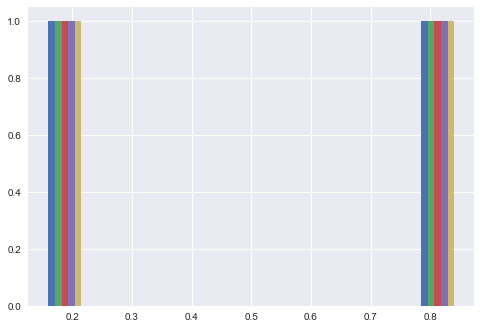

In [363]:
plt.hist(df_3)

### Accuracy score

In [367]:
lg.score(X_test, y_test)

0.8237179487179487